In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('Data.csv')
print (df)

     R&D Spend  Administration  Marketing Spend       State        Profit
0    165349.20      136897.800      471784.1000    New York  192261.83000
1    162597.70      151377.590      443898.5300  California  191792.06000
2    153441.51      101145.550      407934.5400     Florida  191050.39000
3    144372.41      118671.850      383199.6200    New York  182901.99000
4    142107.34       91391.770      366168.4200     Florida  166187.94000
..         ...             ...              ...         ...           ...
995   54135.00      118451.999      173232.6695  California   95279.96251
996  134970.00      130390.080      329204.0228  California  164336.60550
997  100275.47      241926.310      227142.8200  California  413956.48000
998  128456.23      321652.140      281692.3200  California  333962.19000
999  161181.72      270939.860      295442.1700    New York  476485.43000

[1000 rows x 5 columns]


In [18]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [20]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [21]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [22]:
df_cleaned = df.dropna()

In [23]:
df_cleaned = df_cleaned.drop_duplicates()

In [24]:
# Check for duplicate rows
print(df.duplicated().sum())

# Remove duplicate rows
df_unique = df.drop_duplicates()

1


In [25]:
print(df.columns)

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')


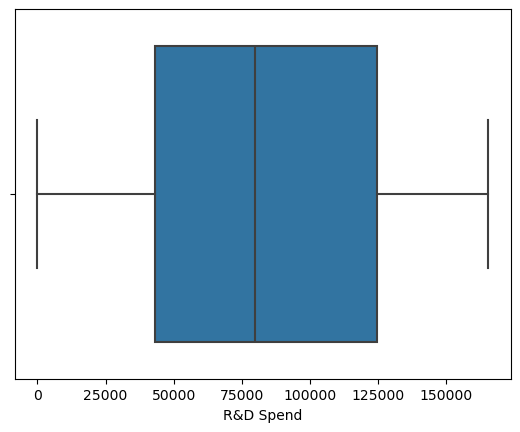

In [26]:
# Visualize outliers using a box plot
sns.boxplot(x=df['R&D Spend'])

# Remove outliers based on a threshold
threshold = 2  # Adjust as needed
df_cleaned = df[np.abs(df['R&D Spend'] - df['R&D Spend'].mean()) <= (threshold * df['R&D Spend'].std())]

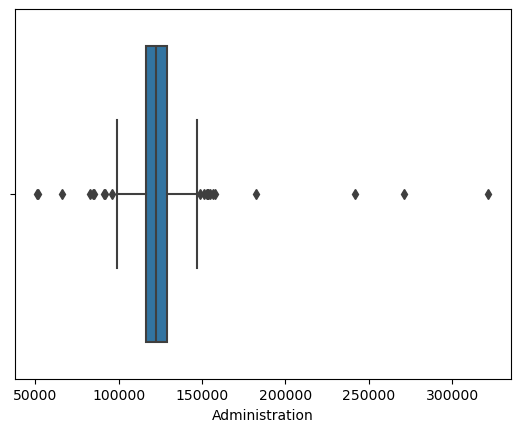

In [27]:
# Visualize outliers using a box plot
sns.boxplot(x=df['Administration'])

# Remove outliers based on a threshold
threshold = 2  # Adjust as needed
df_cleaned = df[np.abs(df['Administration'] - df['Administration'].mean()) <= (threshold * df['Administration'].std())]

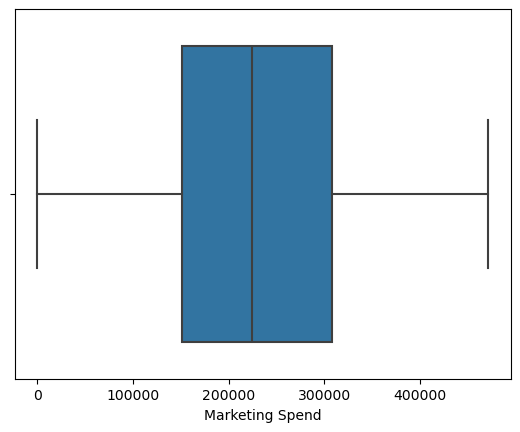

In [28]:
# Visualize outliers using a box plot
sns.boxplot(x=df['Marketing Spend'])

# Remove outliers based on a threshold
threshold = 2  # Adjust as needed
df_cleaned = df[np.abs(df['Marketing Spend'] - df['Marketing Spend'].mean()) <= (threshold * df['Marketing Spend'].std())]

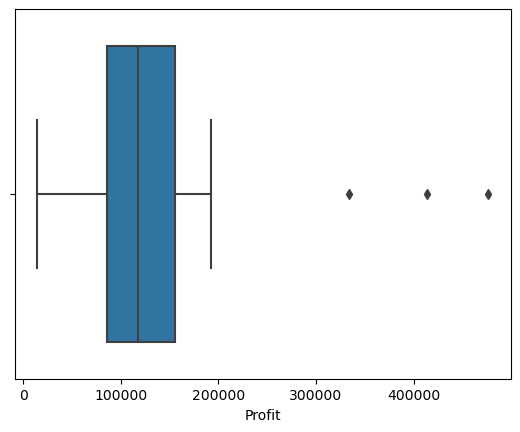

In [29]:
# Visualize outliers using a box plot
sns.boxplot(x=df['Profit'])

# Remove outliers based on a threshold
threshold = 2  # Adjust as needed
df_cleaned = df[np.abs(df['Profit'] - df['Profit'].mean()) <= (threshold * df['Profit'].std())]

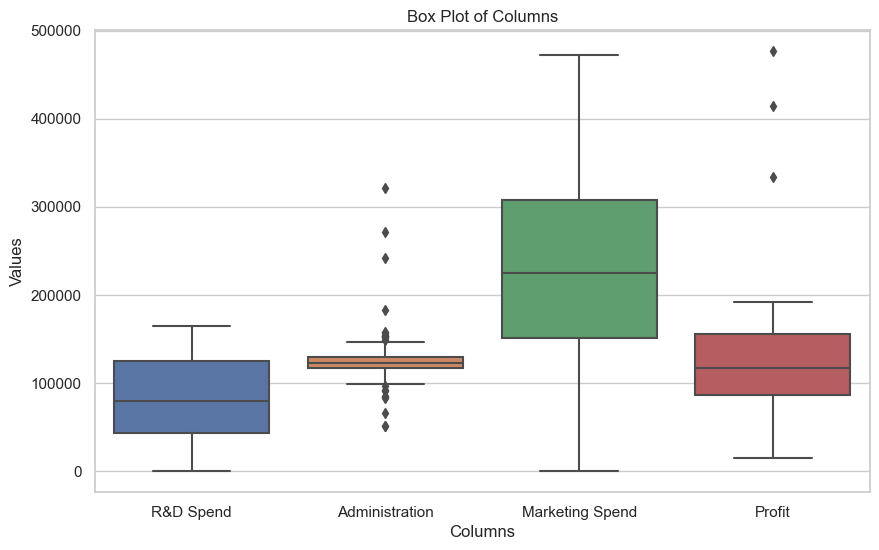

In [36]:
df = pd.read_csv('Data.csv')
numeric_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(10,6))
sns.boxplot(data = numeric_columns)
plt.title('Box Plot of Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()           

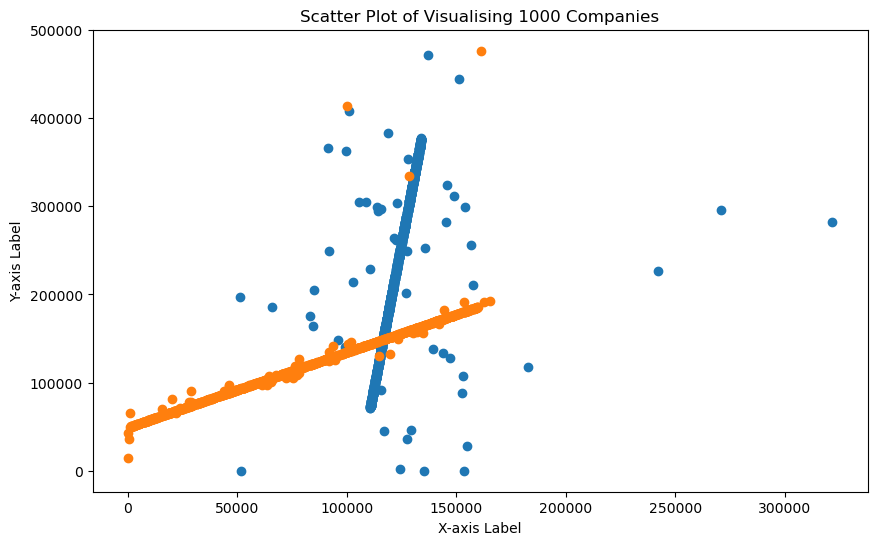

In [30]:
plt.figure(figsize=(10,6))
plt.scatter(df['Administration'], df['Marketing Spend'])
plt.scatter(df['R&D Spend'], df['Profit'])
plt.title('Scatter Plot of Visualising 1000 Companies')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.show()

In [35]:
integer_columns = ['R&D Spend', 'Marketing Spend', 'Administration', 'Profit']

# Remove outliers in integer columns using IQR method
for col in integer_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Print the cleaned data without outliers
print("Cleaned Data without Outliers:")
print(df)

Cleaned Data without Outliers:
     R&D Spend  Administration  Marketing Spend       State        Profit
0    165349.20     136897.8000      471784.1000    New York  192261.83000
2    153441.51     101145.5500      407934.5400     Florida  191050.39000
3    144372.41     118671.8500      383199.6200    New York  182901.99000
5    131876.90      99814.7100      362861.3600    New York  156991.12000
6    134615.46     147198.8700      127716.8200  California  156122.51000
..         ...             ...              ...         ...           ...
992  105127.00     125982.7298      271621.8728     Florida  138841.98810
993   46798.00     117368.4374      159075.9080  California   89012.02672
994   97209.00     124813.3635      256344.0701    New York  132077.70900
995   54135.00     118451.9990      173232.6695  California   95279.96251
996  134970.00     130390.0800      329204.0228  California  164336.60550

[978 rows x 5 columns]


In [38]:
# Calculate the IQR for the column containing outliers
column_name = 'Administration'
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in the column
outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

# Drop the column with outliers
df_cleaned = df.drop(column_name, axis=1)

# Save the cleaned data to a new CSV file
df_cleaned.to_csv('cleaned_data_without_outliers.csv', index=False)